<a href="https://colab.research.google.com/github/Naresh-18/Colab-Notes/blob/Autoencoder/DL_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DL ASSIGNMENT-1


> G.s.s.Naresh.    VU21CSEN0300091



In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
data='/content/drive/MyDrive/Churn_Modelling.csv'
df=pd.read_csv(data)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [33]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
df.drop('Surname',axis=1,inplace=True)
col=['CustomerId','RowNumber']
df.drop(col,inplace=True,axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

## The below block converts the object variables to integer

In [36]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df.head(7)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0


<Axes: xlabel='Tenure', ylabel='Balance'>

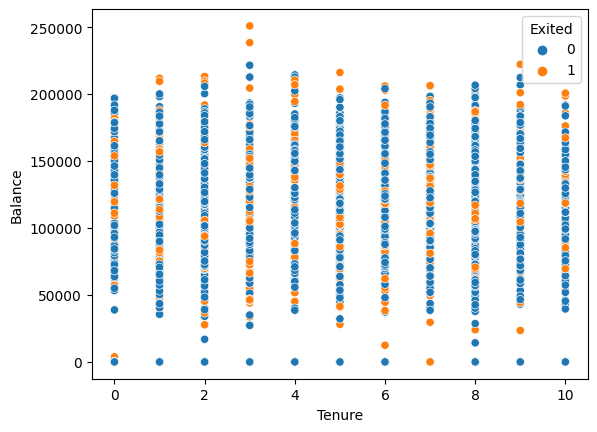

In [37]:
sns.scatterplot(x = 'Tenure', y='Balance', hue='Exited', data=df)

In [38]:
X=df.drop('Exited',axis=1)
y=df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X1_train = scaler.fit_transform(X_train)
X1_test= scaler.transform(X_test)

In [39]:
def create_ann(optimizer):
    model = Sequential([
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [40]:
from sklearn.metrics import accuracy_score
optimizers = ['adam', 'sgd', 'rmsprop']
for optimizer in optimizers:
    print(f"\nTraining with optimizer: {optimizer}")
    ann_model = create_ann(optimizer)
    history=ann_model.fit(X1_train, y_train, epochs=40, validation_split=0.2, batch_size=64)
    y_pred = (ann_model.predict(X1_test) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy with {optimizer}: {acc}")


Training with optimizer: adam
Epoch 1/40
100/100 [==============================] - 2s 6ms/step - loss: 0.4499 - accuracy: 0.8075 - val_loss: 0.3873 - val_accuracy: 0.8431
Epoch 2/40
100/100 [==============================] - 0s 4ms/step - loss: 0.3680 - accuracy: 0.8522 - val_loss: 0.3558 - val_accuracy: 0.8481
Epoch 3/40
100/100 [==============================] - 1s 6ms/step - loss: 0.3492 - accuracy: 0.8566 - val_loss: 0.3550 - val_accuracy: 0.8381
Epoch 4/40
100/100 [==============================] - 1s 6ms/step - loss: 0.3412 - accuracy: 0.8600 - val_loss: 0.3426 - val_accuracy: 0.8581
Epoch 5/40
100/100 [==============================] - 1s 5ms/step - loss: 0.3348 - accuracy: 0.8645 - val_loss: 0.3420 - val_accuracy: 0.8562
Epoch 6/40
100/100 [==============================] - 1s 6ms/step - loss: 0.3275 - accuracy: 0.8673 - val_loss: 0.3533 - val_accuracy: 0.8537
Epoch 7/40
100/100 [==============================] - 1s 5ms/step - loss: 0.3230 - accuracy: 0.8678 - val_loss: 0.346

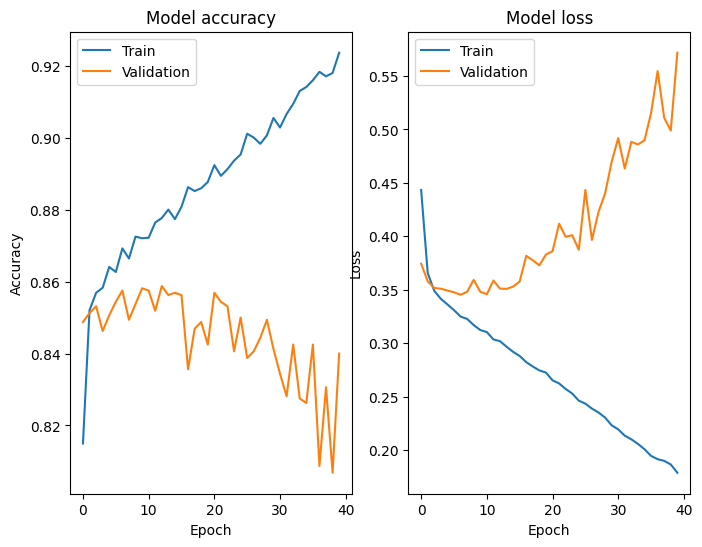

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## So here their is a clear gap the between the Train and validation i.e., the model is overfitting

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,accuracy_score

In [43]:
# using early stopping preventing overfitting
optimizers = ['adam', 'sgd', 'rmsprop']
for optimizer in optimizers:
  ann_model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)
  ann_model.fit(X_train,y_train,epochs=40,batch_size=32,verbose=1,validation_split=0.1,callbacks=[early_stopping])
  y_pred = ann_model.predict(X_test)
  y_pred = (y_pred > 0.5).astype(int)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"\nAccuracy with {optimizer} optimizer: {accuracy}")
  print(f"Confusion Matrix with {optimizer} optimizer:\n{confusion_matrix(y_test, y_pred)}")

Epoch 1/40
225/225 [==============================] - 2s 4ms/step - loss: 1856.8204 - accuracy: 0.6687 - val_loss: 207.1327 - val_accuracy: 0.7287
Epoch 2/40
225/225 [==============================] - 1s 4ms/step - loss: 213.0622 - accuracy: 0.6717 - val_loss: 104.9059 - val_accuracy: 0.7600
Epoch 3/40
225/225 [==============================] - 1s 5ms/step - loss: 181.7922 - accuracy: 0.6831 - val_loss: 167.5074 - val_accuracy: 0.5263
Epoch 4/40
225/225 [==============================] - 1s 5ms/step - loss: 136.4949 - accuracy: 0.6778 - val_loss: 131.3895 - val_accuracy: 0.4913
Epoch 5/40
225/225 [==============================] - 1s 6ms/step - loss: 97.5359 - accuracy: 0.6710 - val_loss: 49.6626 - val_accuracy: 0.7650
Epoch 6/40
225/225 [==============================] - 1s 5ms/step - loss: 74.9589 - accuracy: 0.6808 - val_loss: 39.6088 - val_accuracy: 0.4425
Epoch 7/40
225/225 [==============================] - 1s 3ms/step - loss: 39.6697 - accuracy: 0.6800 - val_loss: 43.0545 - val_

## Using L2 Regularization

In [44]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [45]:
optimizers = ['adam', 'sgd', 'rmsprop']
for optimizer in optimizers:
  model = Sequential()
  model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1],kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss',patience=2, restore_best_weights=True)
  model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1,validation_split=0.1, callbacks=[early_stopping])
  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5).astype(int)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"\nAccuracy with {optimizer} optimizer, regularization, and earlystopping: {accuracy}")
  print(f"Confusion Matrix with {optimizer} optimizer, regularization, andearly stopping:\n{confusion_matrix(y_test, y_pred)}")

Epoch 1/40
225/225 [==============================] - 3s 5ms/step - loss: 246.8603 - accuracy: 0.6890 - val_loss: 6.2305 - val_accuracy: 0.8025
Epoch 2/40
225/225 [==============================] - 1s 4ms/step - loss: 25.9011 - accuracy: 0.7426 - val_loss: 0.6334 - val_accuracy: 0.8037
Epoch 3/40
225/225 [==============================] - 1s 4ms/step - loss: 7.4243 - accuracy: 0.7772 - val_loss: 0.6342 - val_accuracy: 0.8037
Epoch 4/40
225/225 [==============================] - 1s 4ms/step - loss: 3.9512 - accuracy: 0.7846 - val_loss: 0.6282 - val_accuracy: 0.8037
Epoch 5/40
225/225 [==============================] - 1s 4ms/step - loss: 2.8112 - accuracy: 0.7846 - val_loss: 0.6281 - val_accuracy: 0.8037
Epoch 6/40
225/225 [==============================] - 1s 4ms/step - loss: 1.7845 - accuracy: 0.7856 - val_loss: 0.6225 - val_accuracy: 0.8037
Epoch 7/40
225/225 [==============================] - 1s 4ms/step - loss: 2.7226 - accuracy: 0.7851 - val_loss: 0.6565 - val_accuracy: 0.8037
Epo